### Artificial Neural Network

![](images/ann/ann2.png)

### What are the differences and similarities with Perceptron and Logistice regression?

- Perceptron has a single hidden layer and single neuron has an activation function $sign(x)$. ANN can have arbitrary activation functions and numerous hidden layers and neurons.

- Logistic regression can be thought of as a perceptron whose activation has been replaced by a $sigmoid(x)$ activation. 

In [1]:
# import load function
from tools.loaddataset import load

# import decision boundary plotting tool
from tools.dboundary import plotdb

# import the plotting library, set the plot size and theme
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)


# import the number library
import numpy as np

# import tool to plot decision boundary
from tools.dboundary import plotdb

# import the dataframe library
import pandas as pd

In [2]:
# load and plot original data
data = pd.read_csv("../dataset/coins.csv")

In [3]:
# load test and train
X_train, X_test, y_train, y_test = load(csvpath="../dataset/coins.csv")

In [4]:
# import pytorch
import torch
from torch import nn

In [31]:
#del(model)
model = nn.Sequential(
    nn.Linear(2, 1),
    # nn.Linear(1,1),
    nn.Sigmoid()
)
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

![](images/ann/ann.png)

In [36]:
#loss_fn = torch.nn.BCELoss()
loss_fn = torch.nn.MSELoss()

batch_size = 20

optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)

# set within 0 to 1
y_train_mod = y_train - 1

for epoch in range(15000):
    random_indices = np.random.choice(len(X_train),batch_size)
    
    randomX = X_train.to_numpy()[random_indices]
    randomY = y_train_mod.to_numpy()[random_indices]
    
    randomX = torch.tensor(randomX,dtype=torch.float)
    randomY = torch.tensor(randomY,dtype=torch.float)
    
    # forward pass
    yhat = model(randomX)
    
    # calculate loss
    # print(randomY.shape, yhat.flatten().shape)
    loss = loss_fn(randomY, yhat.flatten())
    
    # print info
    if not epoch%500:
        print("epoch:",epoch, "=> loss", loss)
    
    # backpropagate
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    
xt = torch.tensor(X_test.to_numpy(), dtype=torch.float)
yt = torch.tensor(y_test.to_numpy(), dtype=torch.float)
yt_hat = model(xt)

print("--------------------------")
print("Loss", end="")
print(loss_fn(yt_hat.flatten(), yt))

epoch: 0 => loss tensor(0.0844, grad_fn=<MseLossBackward0>)
epoch: 500 => loss tensor(0.1088, grad_fn=<MseLossBackward0>)
epoch: 1000 => loss tensor(0.0855, grad_fn=<MseLossBackward0>)
epoch: 1500 => loss tensor(0.1241, grad_fn=<MseLossBackward0>)
epoch: 2000 => loss tensor(0.0892, grad_fn=<MseLossBackward0>)
epoch: 2500 => loss tensor(0.1030, grad_fn=<MseLossBackward0>)
epoch: 3000 => loss tensor(0.1019, grad_fn=<MseLossBackward0>)
epoch: 3500 => loss tensor(0.1098, grad_fn=<MseLossBackward0>)
epoch: 4000 => loss tensor(0.0685, grad_fn=<MseLossBackward0>)
epoch: 4500 => loss tensor(0.0812, grad_fn=<MseLossBackward0>)
epoch: 5000 => loss tensor(0.0776, grad_fn=<MseLossBackward0>)
epoch: 5500 => loss tensor(0.0877, grad_fn=<MseLossBackward0>)
epoch: 6000 => loss tensor(0.1172, grad_fn=<MseLossBackward0>)
epoch: 6500 => loss tensor(0.0981, grad_fn=<MseLossBackward0>)
epoch: 7000 => loss tensor(0.0783, grad_fn=<MseLossBackward0>)
epoch: 7500 => loss tensor(0.0723, grad_fn=<MseLossBackward

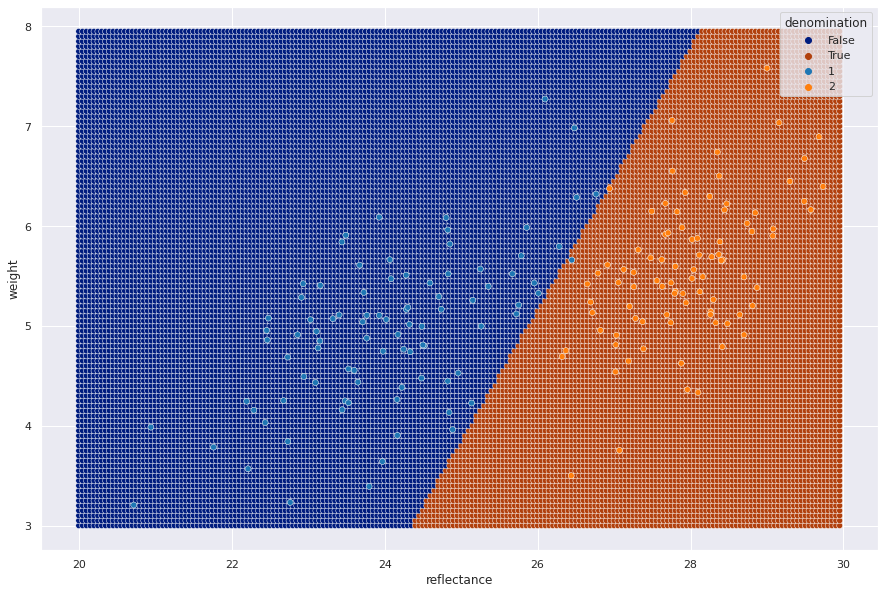

In [37]:
def predict(x,y):
    ip = torch.tensor([x,y],dtype=torch.float)
    op = model(ip)
    # print(op)
    return op.detach().numpy()[0] > 0.5
    
plotdb(predict=predict, originaldata=data)
#for idx in range(len(X_test)):
#    print(predict(X_test.iloc[idx].to_numpy()[0],X_test.iloc[idx].to_numpy()[1]), y_test.iloc[idx])